## Imports

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import Normalizer

In [4]:
#Helper function for reading the .csv file 
def read_file():
    data = np.empty((50,14), dtype=object)
    numeric_data = np.zeros((50,9))
    cnt=-1
    with open(r'top50.csv', 'r') as f:
        reader = csv.reader(f, delimiter=',', escapechar='\\', quotechar='"')
        for line in reader:
            if cnt != -1:
                ID,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity = line
                data[cnt,:] = [ID,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity]
                numeric_data[cnt,:] = [Beats_Per_Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness]
            cnt+=1
    return data, numeric_data

## Agglomerative Hierarchical Clustering

### Read File

In [5]:
data, numeric_data = read_file()
print(numeric_data)

[[117.  55.  76.  -6.   8.  75. 191.   4.   3.]
 [105.  81.  79.  -4.   8.  61. 302.   8.   9.]
 [190.  80.  40.  -4.  16.  70. 186.  12.  46.]
 [ 93.  65.  64.  -8.   8.  55. 198.  12.  19.]
 [150.  65.  58.  -4.  11.  18. 175.  45.   7.]
 [102.  68.  80.  -5.   9.  84. 220.   9.   4.]
 [180.  64.  75.  -6.   7.  23. 131.   2.  29.]
 [111.  68.  48.  -5.   8.  35. 202.  15.   9.]
 [136.  62.  88.  -6.  11.  64. 157.   5.  10.]
 [135.  43.  70. -11.  10.  56. 194.  33.  38.]
 [176.  62.  61.  -5.  24.  24. 251.  60.  31.]
 [ 96.  71.  82.  -4.  15.  38. 185.  28.   7.]
 [110.  41.  50.  -6.  11.  45. 182.  75.   3.]
 [176.  79.  73.  -2.   6.  76. 288.   7.  20.]
 [101.  50.  83.  -4.  12.  10. 205.  10.   5.]
 [ 93.  45.  70.  -7.  16.  14. 261.  12.  15.]
 [176.  65.  75.  -6.  11.  43. 243.  15.  32.]
 [ 90.  48.  76.  -6.   7.  91. 158.  56.   5.]
 [130.  39.  84.  -8.  14.  50. 161.  18.   8.]
 [158.  62.  72.  -3.  12.  41. 173.  11.  11.]
 [124.  74.  68.  -7.   7.  63. 153.   4

### Cluster Data and Plot Dendrogram

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [80.0, 80.0, 120.0, 120.0],
  [27.5, 27.5, 100.0, 100.0]],
 'dcoord': [[0.0, 16.61324772583615, 16.61324772583615, 0.0],
  [0.0, 72.36942264059687, 72.36942264059687, 16.61324772583615],
  [0.0, 68.84039511798287, 68.84039511798287, 0.0],
  [0.0, 80.7031597894407, 80.7031597894407, 68.84039511798287],
  [72.36942264059687,
   175.41447515880236,
   175.41447515880236,
   80.7031597894407],
  [0.0, 66.43794096749235, 66.43794096749235, 0.0],
  [0.0, 120.83105088156296, 120.83105088156296, 0.0],
  [66.43794096749235,
   122.94226287164233,
   122.94226287164233,
   120.83105088156296],
  [0.0, 96.43261896267258, 96.43261896267258, 0.0],
  [0.0, 125.61955149247953,

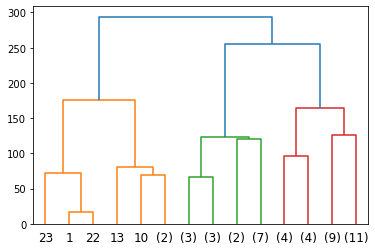

In [6]:
# clustering = AgglomerativeClustering(n_clusters = 2).fit(data)
# print(clustering.labels_)
clustering = linkage(numeric_data, method='ward')
dendrogram(clustering, truncate_mode='level', p=3)

### Find Correlation Between Numeric Features

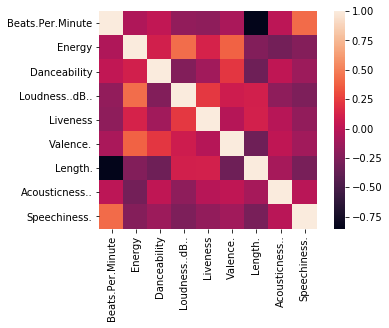

In [144]:
# datap = pd.read_csv('top50.csv')
# datap1 = datap[["Beats.Per.Minute","Energy","Danceability","Loudness..dB..","Liveness","Valence.","Length.","Acousticness..","Speechiness."]]
cor = pd.DataFrame(Normalizer().fit_transform(numeric_data)).corr(method='pearson')
labels = ["Beats.Per.Minute","Energy","Danceability","Loudness..dB..","Liveness","Valence.","Length.","Acousticness..","Speechiness."]
sns.heatmap(cor, square = True, yticklabels=labels, xticklabels=labels)

The highest correlation exists between Beats.Per.Minute and Length.

### Visualization of Clusters

[0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0]


Text(0, 0.5, 'Length')

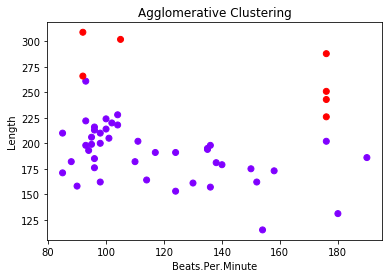

In [161]:
# https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(numeric_data)
print(clustering.labels_)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(numeric_data[:,0], numeric_data[:,6], c=clustering.labels_, cmap='rainbow')
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Beats.Per.Minute')
ax.set_ylabel('Length')

In [163]:
# fig = plt.figure()
# ax = fig.add_subplot(111)

for i in range(max(clustering.labels_) + 1):
    c =  np.argwhere(clustering.labels_ == i)
    print('Cluster ', i + 1, ':\n', np.squeeze(data[[c]][:,:,3]), '\n')

# ax.bar(data[:,3], data[[c1]][:,:,3])

Cluster  1 :
 ['canadian pop' 'dance pop' 'pop' 'dfw rap' 'pop' 'trap music' 'pop'
 'country rap' 'electropop' 'dance pop' 'pop' 'canadian hip hop'
 'dance pop' 'dfw rap' 'canadian hip hop' 'escape room' 'pop house'
 'country rap' 'electropop' 'canadian pop' 'australian pop'
 'canadian hip hop' 'latin' 'latin' 'edm' 'dance pop' 'reggaeton'
 'atl hip hop' 'dance pop' 'big room' 'pop' 'boy band' 'dance pop' 'edm'
 'dance pop' 'dance pop' 'pop' 'r&b en espanol' 'brostep' 'latin'
 'brostep' 'edm' 'pop'] 

Cluster  2 :
 ['reggaeton flow' 'reggaeton' 'panamanian pop' 'latin' 'reggaeton flow'
 'latin' 'panamanian pop'] 

